# 1 Linear Regression -20%

In [8]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,12)


In [9]:
### Linear regression algorithm based on OLS using matrices.
### Algorithm taken from Learning from Data book chapter 3.2

In [10]:
def lin(x,y):
    y = np.array(y)
    X = []
    for el in x:
        temp = [1]
        for j in range(len(el)):
            temp.append(el[j])
        X.append(temp)
    A = np.array(X)
    X_result = np.linalg.pinv(A)
    return np.dot(X_result,y)



### Function for plotting crosses and zeroes

In [11]:
def plot(x,y):
    for i in range(len(x)):
        if y[i] == 1:
            plt.scatter([x[i][0]],[x[i][1]],marker = "o", color = "red")
        else:
            plt.scatter([x[i][0]],[x[i][1]],marker = "x", color = "blue")

In [12]:
### My error function for counting missclassified points from both sides

In [13]:
def error(x,y,w):
    if w[0] == 0 and w[1] == 0:
        return len(x)*10
    pos_top = 0
    neg_top = 0
    pos_down = 0
    neg_down = 0
    for i in range(len(x)):
        test = w[0] + w[1]*x[i][0] + w[2]*x[i][1]
        if test >= 0:
            if y[i] == 1:
                pos_down += 1
            else:
                neg_down += 1
        else:
            if y[i] == 1:
                pos_top += 1
            else:
                neg_top += 1
    proportion = max(min(pos_top,neg_top),min(pos_down,neg_down))/len(x)
    return proportion * 100

### Simple Perceptron algorithm

In [21]:
def pla(x,y,a):
    w = list(a)
    for a in range(15):
        for i in range(len(x)):
            test = w[0] + w[1]*x[i][0] + w[2]*x[i][1]
            if test * y[i] <= 0:
                w[0] = w[0] + y[i]
                w[1] = w[1] + y[i] * x[i][0]
                w[2] = w[2] + y[i] * x[i][1]
    return w

In [15]:
### Simple Pocket algorithm

In [16]:
def pocket_algorithm(x,y):
    w = [0,0,1]
    for i in range(1000):
        w_new = pla(x,y,w)
        if error(x,y,w) >= error(x,y,w_new):
            w = w_new
    return w



### Function for generating random data given its size and slope of the line

In [17]:
def data_generator(size,a):
    x = []
    y = []
    
    for i in range(size):
        r = [rand.randint(-size,size),rand.randint(-size,size)]
        if r[1]<=a*r[0]:
            y.append(1)
        else:
            y.append(-1)
        x.append(r)
    for i in range(size):
        if y[i] == 1:
            if rand.randint(0,10) == 5:
                y[i] = -1
        else:
            if rand.randint(0,10) == 5:
                y[i] = 1     
    return (x,y)

### Function which plots the line w0 + w1*x + w2*y = 0

In [18]:
def plot_w(w,size):
    x1 = -size
    x2 = size
    y1 = (-w[0]-w[1]*x1)/w[2]
    y2 = (-w[0]-w[1]*x2)/w[2]
    plt.plot([x1,x2],[y1,y2])

### Our main function where we generate data and call above functions

In [25]:
def main():
    
    a = rand.randint(-20,20)
    a = a / 10
    
    #Creating training set of size 100
    training_data = data_generator(100,a)
    x_training = training_data[0]
    y_training = training_data[1]
    
    w_pocket = pocket_algorithm(x_training,y_training)
    w_lin = lin(x_training, y_training)

    #Creating testing set of size 1000
    test_data = data_generator(1000,a)
    x_test = test_data[0]
    y_test = test_data[1]

### a is a slope of our line which creates our data set

### Two errors of different algorithms ran on same data set:

In [28]:
    print("Test error for pocket algorithm is:",error(x_test,y_test,w_pocket),"%")
    print("Test error for lin. reg. algorithm is:",error(x_test,y_test,w_lin),"%")

Test error for pocket algorithm is: 21.5 %
Test error for lin. reg. algorithm is: 7.8 %


### Now creating 2 lists to save there different 100 iterations of linear algorithms

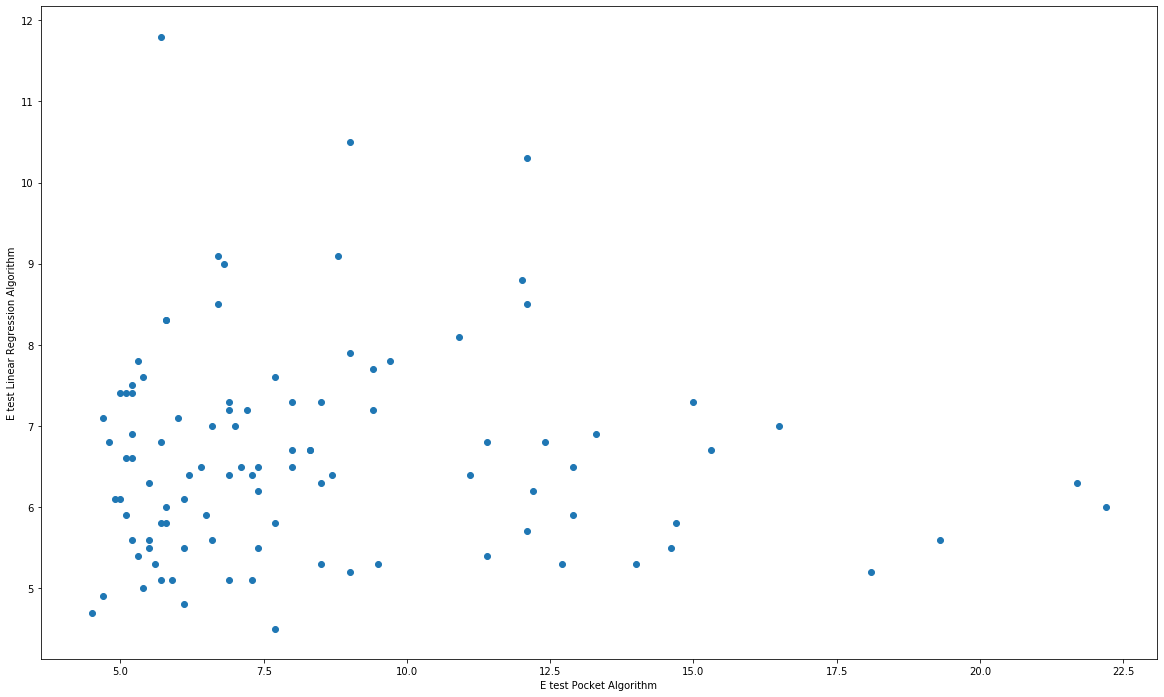

In [34]:
    E_test_pocket = []
    E_test_linreg = []

    for i in range(100):
        #Generating random slope every iteration
        a = rand.randint(-20,20)
        a = a / 10

        training_data = data_generator(100,a)
        x_training = training_data[0]
        y_training = training_data[1]

        w_pocket = pocket_algorithm(x_training,y_training)
        w_lin = lin(x_training, y_training)

        test_data = data_generator(1000,a)
        x_test = test_data[0]
        y_test = test_data[1]
        #saving errors of 2 algorithms 
        E_test_pocket.append(error(x_test,y_test,w_pocket))
        E_test_linreg.append(error(x_test,y_test,w_lin))
    plt.scatter(E_test_pocket, E_test_linreg)
    plt.xlabel('E test Pocket Algorithm')
    plt.ylabel('E test Linear Regression Algorithm')
main()

### Those algorithms have approximately same errors with linear regression having little less. However if we look at the graph there are some cases where pocket algorithm's error exceeds 10-15% percent bar, whereas the error of lin. reg. is solid and doesn't randomly fluctuate.